# 使用PCA降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100) # 这里加入了噪音

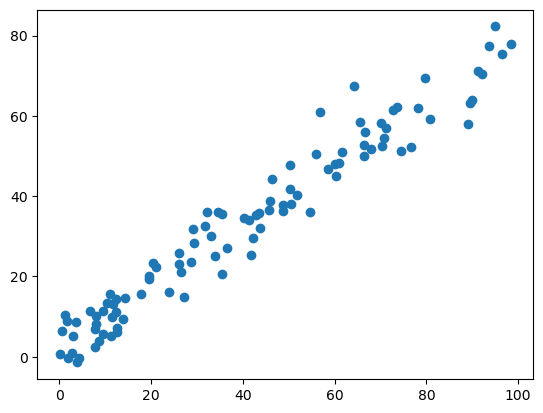

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

虽然数据集展现出这样的结果，但是实际上，这个数据集是否本身就应该是一根直线呢？  
这种抖动可能是噪音，可能来自于测量仪器的误差，可能是计量人员粗心，或者是测量手段有问题？

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

使用PCA来回倒腾一遍

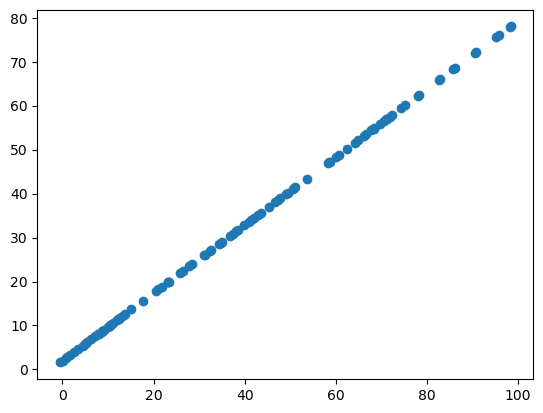

In [5]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

比较上下两个图，这个过程完全理解成，PCA去处了数据的噪音。  
但是实际情况下不好说是数据丢失了，还是噪音被去除了，也不能说，处理后的结果完全没有噪音。  
只是，丢失的信息有很大概率是噪音。  
降低了维度，丢失了信息，同时也去除了一部分噪音。

### 手写识别的例子

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target


In [7]:
# 生成噪音，随机的正态分布的噪音，均值为0，方差为4
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [8]:
# 混入噪音，尝试绘制出数字
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [9]:
example_digits.shape

(100, 64)

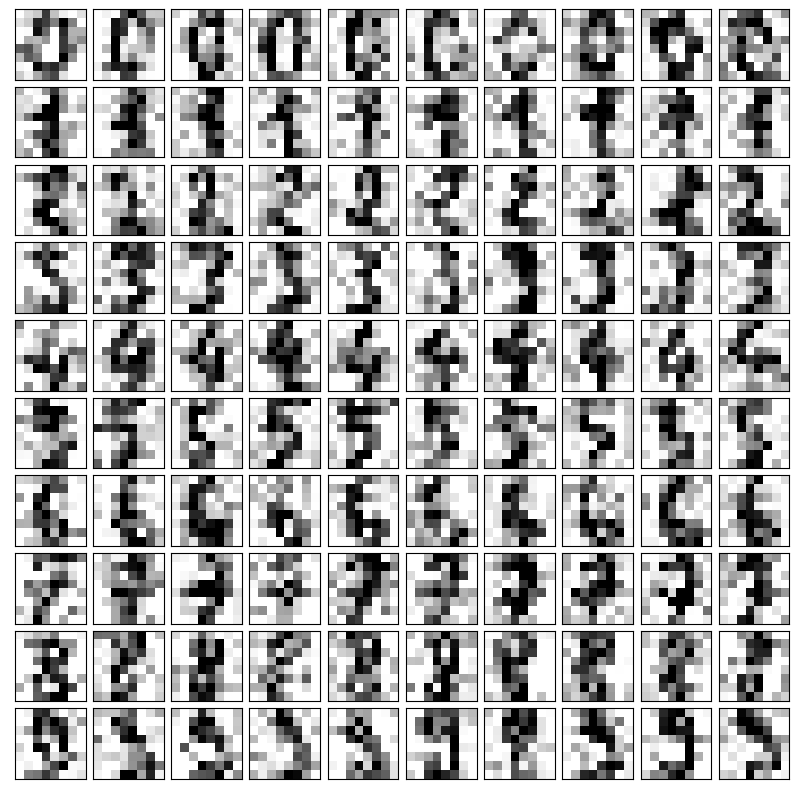

In [10]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

目测噪音比较大，所以只保留原来的50%的方差信息。实际生产中需要调参。

In [11]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

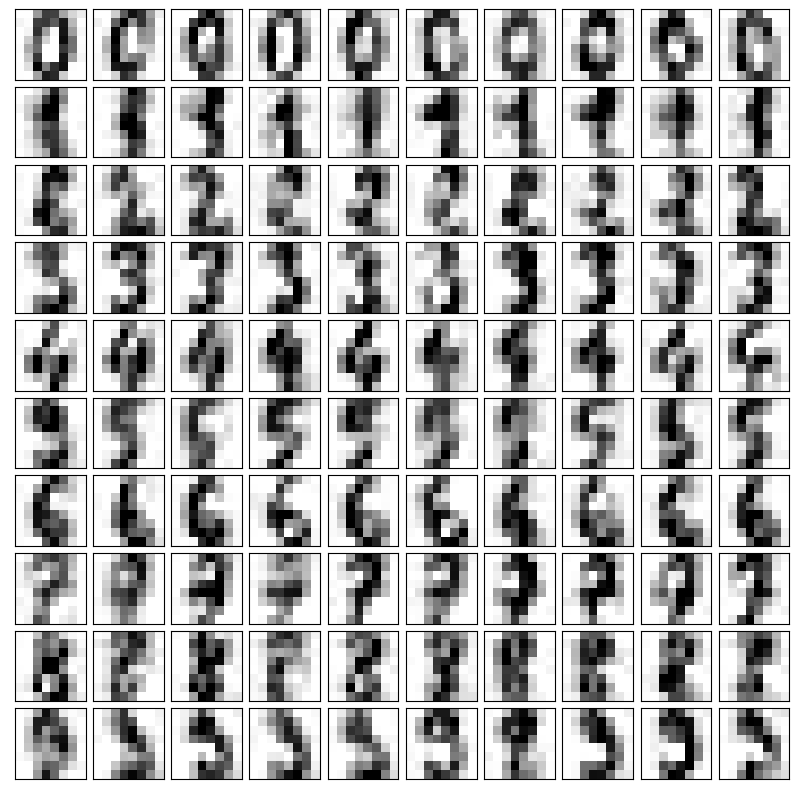

In [12]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

降噪后，更加清晰了捏。